In [1]:
#solution_dsci_chapter_06_database_ops.ipynb
import numpy as np              
import pandas as  pd            
import matplotlib.pyplot as plt 
%matplotlib inline
import os
datafile='earthquakes.csv'

#useful if you want the directory this script is in
if '__file__' in dir():
    path, _=os.path.split(__file__)  
else: path=os.getcwd() 
    
filename=os.path.join(path, datafile)
df=pd.read_csv(filename, parse_dates=[0]) #dialect defaults to Excel

In [2]:
#py_pandas_pivot_tables.ipynb

#use time for the index
df['place']=df['place'].astype(str)
df['place']=df['place'].str.split(',').str.get(1)
df['place']=df['place'].str.strip()
df['place']=df['place'].str.replace("CA", "California")

#  make year, month, and day columns
df['year']=df['time'].dt.year
df['mon']=df['time'].dt.month
df['day']=df['time'].dt.day

#nuke extraneous columns
df.drop(df.columns[[1,2,5,6,7,8,9,11,12,14,15,16,17,18,20,21]], \
        axis=1, inplace=True)

#round to nearest minute and de-dup
df['time']=df['time'].dt.round('min')
df=df.drop_duplicates('time')

#make time the index
df.set_index('time', inplace=True)

df.head(3)

,depth,mag,net,place,status,year,mon,day
time,,,,,,,,
2017-09-19 16:57:00,1.52,2.45,ci,California,automatic,2017,9,19
2017-09-19 16:15:00,2.63,2.92,nc,California,automatic,2017,9,19
2017-09-19 15:35:00,4.52,3.10,us,Idaho,reviewed,2017,9,19


In [3]:
ok = df.query("place=='Oklahoma'")
ok[:3]

,depth,mag,net,place,status,year,mon,day
time,,,,,,,,
2017-09-19 09:44:00,6.72,3.1,us,Oklahoma,reviewed,2017,9,19
2017-09-17 18:53:00,5.00,3.1,us,Oklahoma,reviewed,2017,9,17
2017-09-16 23:27:00,2.57,3.9,us,Oklahoma,reviewed,2017,9,16


In [4]:
cal = df.query("place=='California' and depth>0")
cal[:3]

,depth,mag,net,place,status,year,mon,day
time,,,,,,,,
2017-09-19 16:57:00,1.52,2.45,ci,California,automatic,2017,9,19
2017-09-19 16:15:00,2.63,2.92,nc,California,automatic,2017,9,19
2017-09-19 08:14:00,2.19,2.57,ci,California,automatic,2017,9,19


In [5]:
print("Cal\n", cal.describe())

Cal
            depth        mag    year        mon        day
count  71.000000  71.000000    71.0  71.000000  71.000000
mean    7.311408   2.780282  2017.0   8.605634  16.535211
std     7.050442   0.332510     0.0   0.492193   8.379961
min     0.690000   2.450000  2017.0   8.000000   1.000000
25%     2.320000   2.545000  2017.0   8.000000  11.000000
50%     4.240000   2.640000  2017.0   9.000000  16.000000
75%    10.085000   2.920000  2017.0   9.000000  22.500000
max    37.620000   4.070000  2017.0   9.000000  31.000000


In [6]:
print("OK\n", ok.describe())

OK
            depth        mag    year        mon        day
count  53.000000  53.000000    53.0  53.000000  53.000000
mean    5.305453   2.909434  2017.0   8.509434  17.754717
std     1.978430   0.392362     0.0   0.504695   8.855476
min     1.314000   2.500000  2017.0   8.000000   4.000000
25%     4.710000   2.700000  2017.0   8.000000   9.000000
50%     5.000000   2.800000  2017.0   9.000000  19.000000
75%     5.878000   3.000000  2017.0   9.000000  26.000000
max    14.630000   4.300000  2017.0   9.000000  30.000000


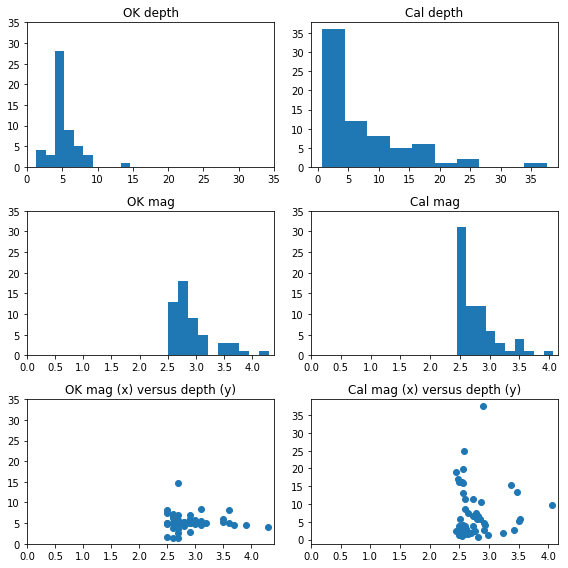

In [7]:
#create a plot object
fig, ax=plt.subplots(nrows=3, ncols=2, figsize=(8,8))
sub00, sub01 = ax[0]
sub10, sub11 = ax[1]
sub20, sub21 = ax[2]

#depth
sub00.hist(ok["depth"] )
sub00.set_title('OK depth')
sub01.hist(cal["depth"] )
sub01.set_title('Cal depth')

yticks=[t for t in range(0,40,5)]
xticks=[t for t in range(0,40,5)]
sub00.xaxis.set_ticks(xticks)
sub00.yaxis.set_ticks(yticks)
sub01.xaxis.set_ticks(xticks)
sub01.yaxis.set_ticks(yticks)

#mag
sub10.hist(ok["mag"] )
sub10.set_title('OK mag')
sub11.hist(cal["mag"] )
sub11.set_title('Cal mag')

yticks=[t for t in range(0,40,5)]
xticks=[round(t/100,1) for t in range(0,450,50)]
sub10.xaxis.set_ticks(xticks)
sub10.yaxis.set_ticks(yticks)
sub11.xaxis.set_ticks(xticks)
sub11.yaxis.set_ticks(yticks)

#mag vs. depth scatter (use sample() to equalize observations)
sample_size=50

sub20.scatter(x=ok["mag"].sample(sample_size), 
              y=ok["depth"].sample(sample_size) )
sub20.set_title('OK mag (x) versus depth (y)')
sub21.scatter(x=cal["mag"].sample(sample_size), 
              y=cal["depth"].sample(sample_size) )
sub21.set_title('Cal mag (x) versus depth (y)')

yticks=[t for t in range(0,40,5)]
xticks=[round(t/100,1) for t in range(0,450,50)]
sub20.xaxis.set_ticks(xticks)
sub20.yaxis.set_ticks(yticks)
sub21.xaxis.set_ticks(xticks)
sub21.yaxis.set_ticks(yticks)

fig.tight_layout()


<module 'matplotlib.pyplot' from 'c:\\Users\\pbarton\\AppData\\Local\\Continuum\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

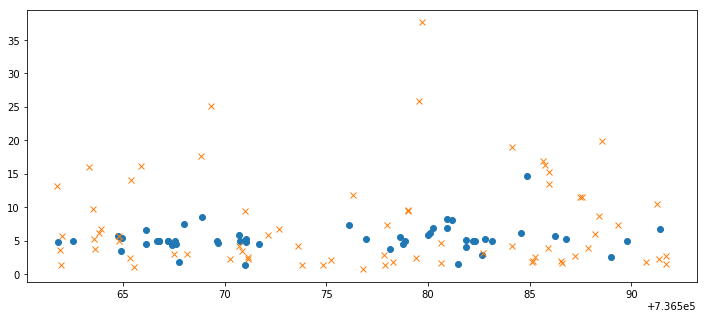

In [15]:
#create "stretch" minute-by-minute DataFrames

ok=df.query("place=='Oklahoma'")
cal = df.query("place=='California' and depth>0")

#figure out the first and last dates
start=min(ok.index.min(), cal.index.min())
end=max(ok.index.max(), cal.index.max())

#... gin up a new date_range for the index
newix=pd.date_range(start, end, freq='min')
ok=ok.reindex(newix)
cal=cal.reindex(newix)


import matplotlib.dates as dates
window=10000
window=len(ok)
start=0
field='depth'

ok_plot=ok[field][start: start+window]
cal_plot=cal[field][start: start+window]

x_as_datetime=ok.index[start: start+window].to_pydatetime()
x_as_floats=dates.date2num(x_as_datetime)
x_plot=x_as_floats

#a two-element bar chart
#plt.bar(x_plot, ok_plot, color='b', width=.01)
#plt.bar(x_plot, cal_plot, color='r', width=.01)

#a two-element line plot
plt.figure(figsize=(12, 5))

plt.plot(x_plot, ok_plot ,'o-')
plt.plot(x_plot, cal_plot, 'x-')
fig.set_size_inches(8, 5)
plt

import matplotlib.dates as dates
x_as_datetime=ser.index
x_as_floats=dates.date2num(x_as_datetime)
x_plot=x_as_floats

#plt.plot(ok['depth'])
#plt.bar(y_locations, ok['depth'][start:start+window])
